In [1]:
from Data.LatentDataset import LatentFMRIDataset
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import orthogonal_procrustes
import numpy as np

In [2]:
nyu_dataset_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_all'
um1_dataset_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/UM_1_all'

In [3]:
nyu_data = LatentFMRIDataset(data_dir=nyu_dataset_directory).get_all_items()
um1_data = LatentFMRIDataset(data_dir=um1_dataset_directory).get_all_items()

In [4]:

X_nyu = nyu_data['X']
y_nyu = nyu_data['y']
X_um1 = um1_data['X']
y_um1 = um1_data['y']

X_nyu_ones = X_nyu[y_nyu == 1]
X_nyu_twos = X_nyu[y_nyu == 2]
X_um1_ones = X_um1[y_um1 == 1]
X_um1_twos = X_um1[y_um1 == 2]

X_nyu_ones = X_nyu_ones.reshape((X_nyu_ones.shape[0], -1))
X_nyu_twos = X_nyu_twos.reshape((X_nyu_twos.shape[0], -1))
X_um1_ones = X_um1_ones.reshape((X_um1_ones.shape[0], -1))
X_um1_twos = X_um1_twos.reshape((X_um1_twos.shape[0], -1))

X_nyu_ones.shape, X_nyu_twos.shape, X_um1_ones.shape, X_um1_twos.shape

((12600, 1152), (16975, 1152), (10030, 1152), (13570, 1152))

In [5]:
n_train_points = int(np.min([X_nyu_ones.shape[0],
                       X_nyu_twos.shape[0],
                       X_um1_ones.shape[0],
                       X_um1_twos.shape[0]]) * 0.8)

Target_mtx = np.concatenate([X_nyu_ones[0:n_train_points], X_nyu_twos[0:n_train_points]])
Source_mtx = np.concatenate([X_um1_ones[0:n_train_points], X_um1_twos[0:n_train_points]])

Target_mtx.shape, Source_mtx.shape

((16048, 1152), (16048, 1152))

In [6]:
n_train_points

8024

In [7]:
R, scale = orthogonal_procrustes(A=Source_mtx, B=Target_mtx)

In [8]:
X_nyu = X_nyu.reshape((X_nyu.shape[0], -1))
X_um1 = X_um1.reshape((X_um1.shape[0], -1))

model = SVC(kernel="rbf", C=10.0, class_weight='balanced', random_state=42, verbose=True)
model.fit(X=X_nyu, y=y_nyu)

[LibSVM]..
*
optimization finished, #iter = 2575
obj = -2893.957494, rho = -1.645709
nSV = 663, nBSV = 361
Total nSV = 663


SVC(C=10.0, class_weight='balanced', random_state=42, verbose=True)

In [9]:
X_um1_test_1 = X_um1_ones[n_train_points:]
X_um1_test_2 = X_um1_twos[n_train_points:]

y1 = np.ones(X_um1_test_1.shape[0])
y2 = np.ones(X_um1_test_2.shape[0]) + 1

X_um1_test_1.shape, X_um1_test_2.shape, y1.shape, y2.shape

((2006, 1152), (5546, 1152), (2006,), (5546,))

In [10]:
X_test = np.concatenate([X_um1_test_1, X_um1_test_2])
y_test = np.concatenate([y1, y2])   

{'accuracy': 0.2656249999648272,
 'recall': 0.05319148935211116,
 'precision': 0.4999999991525424}

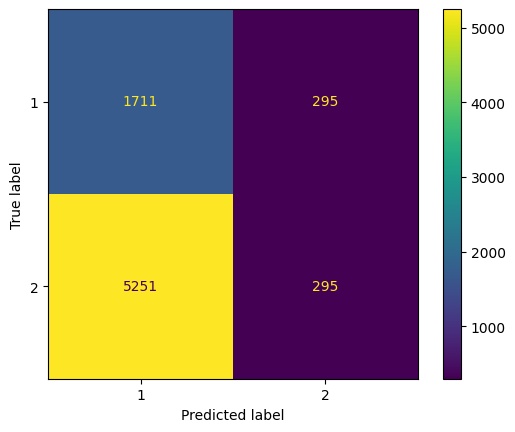

In [11]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
tn, fp, fn, tp = cm.ravel()
metrics = {
    'accuracy': ((tp + tn) / (tp + tn + fp + fn + 1e-6)),
    'recall': (tp / (tp + fn + 1e-6)),
    'precision': (tp / (tp + fp + 1e-6))
}
metrics

In [12]:
X_test = X_test @ R

{'accuracy': 0.5960010592431142,
 'recall': 0.6520014423635049,
 'precision': 0.7633523325388742}

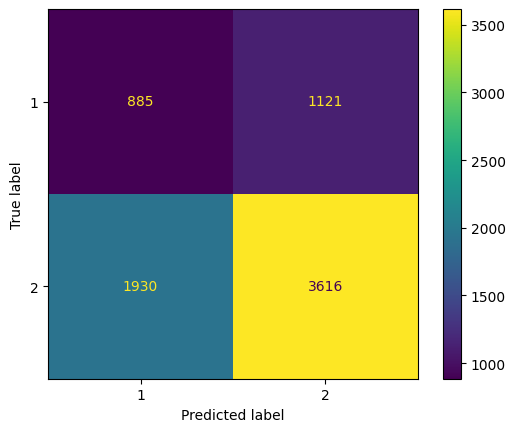

In [13]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
tn, fp, fn, tp = cm.ravel()
metrics = {
    'accuracy': ((tp + tn) / (tp + tn + fp + fn + 1e-6)),
    'recall': (tp / (tp + fn + 1e-6)),
    'precision': (tp / (tp + fp + 1e-6))
}
metrics